# Proyecto 4 de Bioseñales y sistemas

> Angie Melissa Londoño Castaño

**Inicialmente se deben importar las librerias con las que se ejecutaron todos los códigos, las cuales son: numpy, scipy, matplotlib, glob y pandas.**

In [ ]:
 # Se importan las librerias
import numpy as np;
import matplotlib.pyplot as plt
import glob
import scipy.io as sio;
from scipy.signal import welch as pwelch
import pandas as pd
import os
import librosa
import pywt
import librosa.display
import scipy.signal as signal
from google.colab import drive
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocesamiento y acondicionamiento de la señal

**1. Descargar la base de datos y revisar la presentación que se hizo de la misma el día 22-24 de septiembre.**

In [ ]:
# Se importan los archivos
archivos_textos = glob.glob('/content/drive/Shareddrives/Proyecto_final/Datos/Textos/*.txt')
archivos_audios = glob.glob('/content/drive/Shareddrives/Proyecto_final/Datos/Audios/*.wav')
demo_dataframe = pd.read_csv('/content/demographic_info.txt') #Hay que subir ese archivo desde el pc


920


**2. Hacer una descripción de la base de datos en cuanto a la distribución de edades y ubicación del estetoscopio.**

In [ ]:
# El siguiente código extrae las ubicaciones del estetoscopio
ubicaciones = []      # Lista vacía para almacenar las ubicaciones del estetoscopio en el pecho
for archivo in archivos_textos:
  nombre = str(os.path.split(archivo)[1])     # Nombre de cada archivo
  sin_ext = os.path.splitext(nombre)[0]     # Se le quita la extension (.txt)
  div = sin_ext.split('_')     # Se dividen los elementos del nombre
  ubicaciones.append(div[2])    # Se extraen las ubicaciones de cada archivo y se agregan a la lista
Tc = ubicaciones.count('Tc')    # Con la función 'count' se cuentan cuantas instancias de Tc hay en ubicaciones
Al = ubicaciones.count('Al')    # De manera analoga a la linea anterior, se cuantan cuantos archivos de Al hay
Ar = ubicaciones.count('Ar')    # De manera analoga con la anterior y las siguientes
Pl = ubicaciones.count('Pl')
Pr = ubicaciones.count('Pr')
Ll = ubicaciones.count('Ll')
Lr = ubicaciones.count('Lr')
total = len(ubicaciones)      # Total de archivos


920


In [ ]:
# El siguiente código extrae los datos de las edades en porcentajes y por rangos
demo_lista = demo_dataframe.to_numpy().tolist() # Convierte un dataframe a un lista
edades = []
for lista in demo_lista:
  lista = lista[0]
  recorte = lista.split()
  age = float(recorte[1]) # Hay un dato que modifiqué, le puse una edad de 0 a un paciente que tenía NA
  edades.append(age) # Lista de edades
edades = np.array(edades) # de lista a numpy
diez = edades[(edades < 10)]       # Pacientes entre 0 y 10 años de edad
d10_h20 = edades[(edades >= 10) & (edades < 20)]    # Pacientes entre 10 y 20 años
d20_h30 = edades[(edades >= 20) & (edades < 30)]    # Pacientes entre 20 y 30 años
d30_h40 = edades[(edades >= 30) & (edades < 40)]    # Se lee: desde 20 hasta 30 (d20_h30)
d40_h50 = edades[(edades >= 40) & (edades < 50)]
d50_h60 = edades[(edades >= 50) & (edades < 60)]
d60_h70 = edades[(edades >= 60) & (edades < 70)]
d70_h80 = edades[(edades >= 70) & (edades < 80)]
d80 = edades[(edades >= 80)]
print('\n Descripción: \n\n  De 125 pacientes, las edades se distribuyen así: \n '
      '\n El ' + str((diez.size/edades.size)*100) + '% tienen menos de 10 años'
      '\n El ' + str((d10_h20.size/edades.size)*100) + '% tienen entre 10 y 20 años'
      '\n El ' + str((d20_h30.size/edades.size)*100) + '% tienen entre 20 y 30 años'
      '\n El ' + str((d30_h40.size/edades.size)*100) + '% tienen entre 30 y 40 años'
      '\n El ' + str((d40_h50.size/edades.size)*100) + '% tienen entre 40 y 50 años'
      '\n El ' + str((d50_h60.size/edades.size)*100) + '% tienen entre 50 y 60 años'
      '\n El ' + str((d60_h70.size/edades.size)*100) + '% tienen entre 60 y 70 años'
      '\n El ' + str((d70_h80.size/edades.size)*100) + '% tienen entre 70 y 80 años'
      '\n El ' + str((d80.size/edades.size)*100) + '% tienen mas de 80 años'
      '\n\n  Del estetoscopio: \n'
      '\n El ' + str((Tc/total)*100) + '% están ubicados en la traquea'
      '\n El ' + str((Al/total)*100) + '% están ubicados en la Anterior left'
      '\n El ' + str((Ar/total)*100) + '% están ubicados en la Anterior right'
      '\n El ' + str((Pl/total)*100) + '% están ubicados en la Posterior left'
      '\n El ' + str((Pr/total)*100) + '% están ubicados en la Posterior right'
      '\n El ' + str((Ll/total)*100) + '% están ubicados en la Lateral left'
      '\n El ' + str((Lr/total)*100) + '% están ubicados en la Lateral right')


 Descripción: 

  De 125 pacientes, las edades se distribuyen así: 
 
 El 31.2% tienen menos de 10 años
 El 8.799999999999999% tienen entre 10 y 20 años
 El 0.8% tienen entre 20 y 30 años
 El 0.0% tienen entre 30 y 40 años
 El 0.8% tienen entre 40 y 50 años
 El 7.199999999999999% tienen entre 50 y 60 años
 El 22.400000000000002% tienen entre 60 y 70 años
 El 23.200000000000003% tienen entre 70 y 80 años
 El 5.6000000000000005% tienen mas de 80 años

  Del estetoscopio: 

 El 14.130434782608695% están ubicados en la traquea
 El 17.608695652173914% están ubicados en la Anterior left
 El 18.26086956521739% están ubicados en la Anterior right
 El 15.108695652173912% están ubicados en la Posterior left
 El 14.347826086956522% están ubicados en la Posterior right
 El 8.369565217391305% están ubicados en la Lateral left
 El 12.173913043478262% están ubicados en la Lateral right


**3. Crear una función que reciba una señal de audio de auscultación y la devuelva filtrada en el rango determinado para estas señales**

In [ ]:
def filtros_butter (ruta_audio):
  '''
  Esta función recibe un ruta y devuelve un vector
  '''
  sign, fs = librosa.load(ruta_audio)    # signal and sampling rate

  #Filtro pasa altas, orden 1700, frecuencia de corte 100 hz con la función firwin
  Wch = 100     # Frecuencia de corte del filtro pasa altas
  Wnqh = fs/2     # Frecuencia de Nyquist
  Wnh = Wch/Wnqh    # Normalizacion frecuencia de corte
  fh = signal.firwin(1700+1, Wnh, pass_zero = False)
  filt_high = signal.lfilter(fh, [1.0], sign)

  #Filtro pasa bajas, orden 1700, frecuencia de corte 2000 hz
  Wcl = 2000    # Frecuencia de corte filtro pasabajas
  Wnql = fs/2     # Frecuencia de Nyquist
  Wnl = Wcl/Wnql    # Normalizacion frecuencia de corte
  fl = signal.firwin(1700+1, Wnl) #pasa bajas
  filt_low = signal.lfilter(fl, [1.0], filt_high)
  return filt_low

**4. Crear una función que aplique el filtrado wavelet para la eliminación de ruidos cardiacos en los audios de las auscultaciones usando los elementos del trabajo 2.**

In [ ]:
# ------------------------------------------------------
# Esta función se necesita para la función filtrar
# Tipo de aplicación del umbral
def umbralizar (detalle, app_umbral, lamb, sigma):
  cont1=0
  if app_umbral == 0:     # Soft
    for punto in detalle:
      abso = np.absolute(punto)
      criterio = lamb*sigma
      if abso < criterio:
        detalle[cont1]=0
      else:
        detalle[cont1]=np.sign(punto)*(abso-lamb)
      cont1+=1
  elif app_umbral == 1:    # Hard
    detalle[np.absolute(detalle) < (lamb * sigma)] = 0
  else:
    print('Opción incorrecta')
# ----------------------------------------------------------

# La siguiente función aplica el filtro wavelet
def filtrar (vector):
  app_umbral = 1    # Hard
  est_umbral = 0    # Universal
  ponderacion = 2     # Multilevel
  nivel = 4     # Para modificar el nivel cambiar aqui
  Wavelet = 'db4'     # Para cambiar el tipo de wavelet cambiar aqui
  descomp = pywt.wavedec(vector, Wavelet, level=nivel)    # Descomposición en aproximación y detalles
  detalles = descomp[1:nivel+1]     # Solo detalles
  N = vector.size

  # Estimación del umbral
  if est_umbral == 0:     # Univeral
    lamb = np.sqrt(2*np.log10(N))
  elif est_umbral == 1:     # Minimax
    lamb = 0.3936+0.1829*(np.log10(N)/(np.log10(2)))
  elif est_umbral == 2:
    n = N
    sx2=np.power(np.sort(np.abs(vector)),2)
    risks = (n-2*(np.arange(1,n+1))+np.cumsum(sx2)+(np.arange(0,n)[::-1])*sx2)/n
    min= np.min(risks)
    pos= np.where(risks==min)
    best=pos[0]
    thr=np.sqrt(sx2[best[0]])
    lamb = thr
  else:
    print('Opción incorrecta')

  # Tipo de ponderación
  if ponderacion == 0:
    sigma = 1
    for det in detalles:
      umbralizar (det, app_umbral, lamb, sigma)
  elif ponderacion == 1:
    sigma = (np.median(np.absolute(detalles[0])))/0.6745
    for det in detalles:
      umbralizar (det, app_umbral, lamb, sigma)
  elif ponderacion == 2:
    for niv in range (0,nivel):
      sigma = (np.median( np.absolute( detalles[niv]))) / (0.6745)
      umbralizar (detalles[niv], app_umbral, lamb, sigma)
  else:
    print ('Opción incorrecta')

  # Transformada inversa
  coeficientes = [descomp[0]]
  coeficientes.extend(detalles)
  senal_filtrada = pywt.waverec(coeficientes, Wavelet)    # Reconstrucción de la señal
  senal_filtrada = senal_filtrada[0:vector.size]    # Se recorta la señal para que quede del mismo tamaño que la original
  senal_pequena = vector-senal_filtrada     # A la señal original se le restan los ruidos cardiacos
  return senal_pequena

# Configuración de cada wavelet
# app_umbral = int(input('\n Para un umbral Soft ingrese 0, Para un umbral Hard ingrese 1: '))
# est_umbral = int(input('\n Para un umbral Universal ingrese 0, Para un umbral Minimax ingrese 1,  Para un umbral Sure ingrese 2: '))
# ponderacion = int(input('\n Para una ponderacion One ingrese 0, Para Single level ingrese 1, Para Multilevel ingrese 2: '))
# Por ahora dejemos la configuración así como dicen las tres primeras lineas de la función filtrar

**5. Crear una función que permita el preprocesamiento de la señal usando los filtros previos**

In [ ]:
def todos_los_filtros (ruta_audio):
  filtro_pasas = filtros_butter(ruta_audio)    # Filtro pasa bandas de 100 Hz a 2000 Hz
  filtro_cardiaco = filtrar(filtro_pasas)     # Filtro wavelet a la señal anterior
  return filtro_cardiaco


**6. Crear una función que reciba la ruta de un archivo de audio y la ruta del archivo de anotaciones y extraiga del archivo de audio los ciclos respiratorios con su respectiva anotación de estertores y sibilancias**

In [ ]:
# Para poder hacer el filtrado de las señales antes de recortar los ciclos, se cambió el primer
# argumento de la función (audio) por la señal misma en vez de usar la ruta
def recorte_ciclos (audio, anotacion):
  '''
  Audio es la señal (un vector) y Anotación es una ruta, esta función retorna una lista con arrays de numpy
  '''
  fs = 22050
  anotacion_dataframe = pd.read_csv(anotacion)    # Se abre el archivo de la ruta, se muestra en un dataframe
  anotacion_lista = anotacion_dataframe.to_numpy().tolist()     # Convierte un dataframe a un lista (todas las muestras)
  ciclos_respiratorios = []     # En esta lista se almacenan los ciclos respiratorios, osea las muestras
  for lista in anotacion_lista:
    muestra_str = lista[0]    # Cada muestra
    datos = muestra_str.split()     #Se extraen los datos, osea la fila de números
    m = audio[int(fs*float(datos[0])):int(fs*float(datos[1]))]    # Se recorta la muestra de la señal
    ciclo_y_diagnostico = [m,int(datos[2]),int(datos[3])]     # Organiza los datos que se retornan ( recorte, sibilancias, crepitancias)
    ciclos_respiratorios.append(ciclo_y_diagnostico)    # Se almacena la info en la lista
  return ciclos_respiratorios

# Ejemplo de aplicación
audio1 = archivos_audios[1]
senal_ej, fs = librosa.load(audio1)    #signal and sampling rate
anotacion1 = archivos_textos[1]
recorte_ciclos(senal_ej, anotacion1) # Ejemplo de aplicación

[[array([-0.03019496, -0.03012408, -0.02998287, ...,  0.03516665,
          0.03528865,  0.03528235], dtype=float32), 0, 0],
 [array([ 0.03541584,  0.03540311,  0.03535362, ..., -0.02501736,
         -0.02515806, -0.02533827], dtype=float32), 0, 0],
 [array([-0.02538169, -0.02548999, -0.02557764, ...,  0.08985042,
          0.08991036,  0.08988475], dtype=float32), 0, 0],
 [array([0.0899796 , 0.0900159 , 0.08993982, ..., 0.02579388, 0.02597291,
         0.02622333], dtype=float32), 0, 0],
 [array([ 0.02645453,  0.02663192,  0.02688173, ..., -0.11300674,
         -0.11097977, -0.10879926], dtype=float32), 0, 0],
 [array([-0.10662383, -0.10447415, -0.10226684, ...,  0.00281401,
          0.00264403,  0.00255619], dtype=float32), 0, 0],
 [array([0.00262012, 0.0025837 , 0.00262104, ..., 0.010369  , 0.00982708,
         0.00942503], dtype=float32), 0, 0],
 [array([ 0.00897833,  0.00848201,  0.00808416, ..., -0.05891943,
         -0.05897982, -0.05902277], dtype=float32), 0, 0],
 [array([-0.

## Procesamiento y extracción de características de la señal

**7. Definir una estrategia de análisis que tenga en cuenta rango de edades y ubicación del estetoscopio**

Se clasificaron los datos de acuerdo a los siguientes parámetros:

* Edad: mayores de 45 años
* Ubicación del estetoscópio: Anterior right, Anterior left, Posterior right y Posterior left

De la base de datos se omitieron los pacientes que no cumplian en su totalidad con las ubicaciones del estetoscopio previamente estipuladas.

Inicialmente se buscó clasificar la edad en tres grupos así: infantes (0-20), adultos (20-60) y mayores (60-inf). Sin embargo, haciendo la clasificación se encontró que no hay pacientes menores de 45 años que tengan el esquema completo de ubicaciones del estetoscopio, por lo que se decidió dejar un solo grupo para el análisis: los mayores de 45 años

In [ ]:
# Se extraen las rutas de los Anterior right, que son los que más abundan en la base de datos y se almacenan en la variable reduccion
reduccion = []
for audio in archivos_audios:
  nom_audio = str(os.path.split(audio)[1])     # Nombre de cada archivo
  s_ext = os.path.splitext(nom_audio)[0]     # Se le quita la extension (.txt)
  div = s_ext.split('_')     # Se dividen los elementos del nombre
  if div[2] == 'Ar':
    reduccion.append(audio)

In [ ]:
todos_los_ciclos = []     # Lista para almacenar los ciclos

for audio_Ar in reduccion:    # Se recorren todos los audios Ar
  nombre_audio = str(os.path.split(audio_Ar)[1])     # Nombre de cada archivo Ar
  sin_ext = os.path.splitext(nombre_audio)[0]     # Se le quita la extension (.txt)
  div = sin_ext.split('_')     # Se dividen los elementos del nombre

  # A continucación están las rutas de las notas y los audios asociados a las ubicaciones del estetoscopio seleccionadas
  # NO todas estas rutas existen
  ruta_notas_Ar = '/content/drive/Shareddrives/Proyecto_final/Datos/Textos/'+ sin_ext + '.txt' # Advertencia !!!
  ruta_notas_Al = '/content/drive/Shareddrives/Proyecto_final/Datos/Textos/'+ div[0] +'_'+ div[1] + '_Al_' + div[3] +'_' + div[4] + '.txt'
  ruta_notas_Pr = '/content/drive/Shareddrives/Proyecto_final/Datos/Textos/'+ div[0] +'_'+ div[1] + '_Pr_' + div[3] +'_' + div[4] + '.txt'
  ruta_notas_Pl = '/content/drive/Shareddrives/Proyecto_final/Datos/Textos/'+ div[0] +'_'+ div[1] + '_Pl_' + div[3] +'_' + div[4] + '.txt'
  audio_Al = '/content/drive/Shareddrives/Proyecto_final/Datos/Audios/'+ div[0] +'_'+ div[1] + '_Al_' + div[3] +'_' + div[4] + '.wav'
  audio_Pr = '/content/drive/Shareddrives/Proyecto_final/Datos/Audios/'+ div[0] +'_'+ div[1] + '_Pr_' + div[3] +'_' + div[4] + '.wav'
  audio_Pl = '/content/drive/Shareddrives/Proyecto_final/Datos/Audios/'+ div[0] +'_'+ div[1] + '_Pl_' + div[3] +'_' + div[4] + '.wav'

  # A continuación se pregunta si las rutas de audio existen para este paciente
  esta_Al = audio_Al in archivos_audios
  esta_Pr = audio_Pr in archivos_audios
  esta_Pl = audio_Pl in archivos_audios
  if esta_Al and esta_Pl and esta_Pr:
    # Si dichos archivos existen, entonces se extraen los ciclos de cada uno y se almacenan en la lista de todos los ciclos
    ciclos_Ar = recorte_ciclos(todos_los_filtros(audio_Ar),ruta_notas_Ar)
    todos_los_ciclos.extend(ciclos_Ar)
    ciclos_Al = recorte_ciclos(todos_los_filtros(audio_Al),ruta_notas_Al)
    todos_los_ciclos.extend(ciclos_Al)
    ciclos_Pr = recorte_ciclos(todos_los_filtros(audio_Pr),ruta_notas_Pr)
    todos_los_ciclos.extend(ciclos_Pr)
    ciclos_Pl = recorte_ciclos(todos_los_filtros(audio_Pl),ruta_notas_Pl)
    todos_los_ciclos.extend(ciclos_Pl)
    # -------------------------------------------------------------------------------
    # Este código busca la edad del paciente
    # Ejecutando este código nos dimos cuenta de que no hay pacientes menores de 45 años que tengan
    # el esquema completo de ubicaciones del estetoscopio que se determinó para el análisis
    '''
    for lista in demo_lista:
      lista_str = lista[0]
      recorte = lista_str.split()
      paciente = recorte[0]
      if paciente == div[0]:
        edad = int(recorte[1])
        print(edad)
    '''
    # -------------------------------------------------------------------------------

In [ ]:
# El siguiente código clasifica cada ciclo de acuerdo a la patología
# Debe considerarse que pueden existir ciclos sibilantes que también son crepitantes y visceversa (eso creo)
ciclos_normales = []
ciclos_sibilancias = []
ciclos_crepitancias = []

for ciclo in todos_los_ciclos:
  crep = ciclo[1]     # Crepitancia
  sib = ciclo[2]    # Sibilancia
  if sib == 1:
    ciclos_sibilancias.append(ciclo[0])
  elif crep == 1:
    ciclos_crepitancias.append(ciclo[0])
  else:
    ciclos_normales.append(ciclo[0])

**8. En un gráfico comparar la densidad espectral de potencia promedio de los ciclos normales, ciclos con sibilancias y ciclos con crepitancias, e identificar si existe un rango de frecuencias donde se maximice la diferencia entre las tres poblaciones**

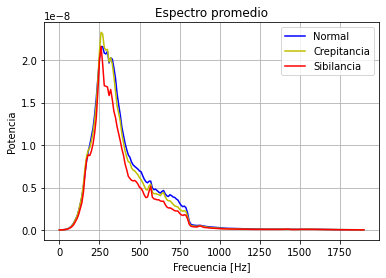

In [ ]:
def curva_espectro(c_normal, c_crepitancia, c_sibilancia):
  '''
  Esta funcion recive 3 grupos de datos y genera gráficos de espectro promedio
  comparando cada grupo ( N, C, S)
  '''

  def espectro(ciclo):
    ''' Se calcula el espectro frecuencial para un ciclo'''
    num_puntos_por_segundo = 10000;  # Frecuencia de muestreo
    nperseg = 1000;  #Tamano de ventana
    noverlap = int(nperseg/2);  #Solapamiento de ventana
    f, Pxx = pwelch(ciclo, num_puntos_por_segundo, 'hanning', nperseg, noverlap);  #Calculamos la densidad espectral para toda la senal
    banda = Pxx[(f >= 100) & (f <= 2000)];  #se extrae la potencia de la banda
    return banda, f[0:len(banda)]

  banda1=np.zeros((191))
  banda2=np.zeros((191))
  banda3=np.zeros((191))

  for j in range(len(c_normal)):   #Se itera sore el numero de canales

    b,f=espectro(c_normal[j]);  #usamos la funcion espectro para el canal j del sujeto a
    banda1=banda1+b;   #Sumamos el espectro de cada sujeto control

  for j in range(len(c_crepitancia)):   #Se itera sore el numero de canales

    b,f=espectro(c_normal[j]);  #usamos la funcion espectro para el canal j del sujeto a
    banda2=banda2+b;   #Sumamos el espectro de cada sujeto control\

  for j in range(len(c_sibilancia)):   #Se itera sore el numero de canales

    b,f=espectro(c_normal[j]);  #usamos la funcion espectro para el canal j del sujeto a
    banda3=banda3+b;   #Sumamos el espectro de cada sujeto control




  '''Se generan los gráficos de espectro promedio comparando cada canal entre los dos grupos en un subplot por canal'''
  plt.figure()
  plt.plot(f,banda1/(len(c_normal)),'b',label='Normal');
  plt.plot(f,banda2/(len(c_crepitancia)),'y',label='Crepitancia');
  plt.plot(f,banda3/(len(c_sibilancia)),'r',label='Sibilancia');
  plt.legend()
  plt.xlabel('Frecuencia [Hz]');
  plt.ylabel('Potencia');
  plt.title('Espectro promedio')
  plt.grid()
  plt.show();
  return
curva_espectro(ciclos_normales, ciclos_crepitancias, ciclos_sibilancias )

Se encuentran diferencias marcadas en los rangos:
250-370 Hz y
470-770 Hz

**9. Crear una función que reciba un ciclo respiratorio y extraiga la densidad espectral de potencia en los rangos de interés identificados en el punto 8 como un índice de análisis**

In [ ]:
def indice_espectro(ciclo):
  num_puntos_por_segundo = 10000;  # Frecuencia de muestreo
  nperseg = 1000;  #Tamano de ventana
  noverlap = int(nperseg/2);  #Solapamiento de ventana
  f, Pxx = pwelch(ciclo, num_puntos_por_segundo, 'hanning', nperseg, noverlap);  #Calculamos la densidad espectral para toda la senal
  banda= np.sum(Pxx[(f >= 250) & (f <= 370)]);  #se extrae la potencia de la banda y se suma
  total = np.sum(Pxx[(f >= 100) & (f <= 2000)]);
  indice1=banda/total; #encontramos un indice relativo al paciente

  f, Pxx = pwelch(ciclo, num_puntos_por_segundo, 'hanning', nperseg, noverlap);  #Calculamos la densidad espectral para toda la senal
  banda= np.sum(Pxx[(f >= 470) & (f <= 770)]);  #se extrae la potencia de la banda y se suma
  total = np.sum(Pxx[(f >= 100) & (f <= 2000)]);
  indice2=banda/total; #encontramos un indice relativo al paciente
  return indice1, indice2
espectro(ciclos_normales[1])


(0.2873790420816347, 0.2735244384963668)

**10. Crear una función que reciba un ciclo respiratorio y extraiga la entropía de permutación**

In [ ]:
def Entropia_de_Permutacion (ciclo):
  '''
  Esta funcion recibe un vector y retorna un flotante
  Usando D=3 y Tau=1
  '''
  s = np.array(ciclo)     # Señal
  tamano = s.shape    # Tamaño de la señal
  indices = range(tamano[0]-1)     # Vector de indices
  matriz = [0,0,0]    # fila de ceros de tamaño 3x1
  for v in indices:     # Este ciclo se utiliza para la partición del espacio de estado, lo cual no puede hacerse con numpy
    vfila = [s[v-1],s[v],s[v+1]]
    matriz = np.vstack([matriz,vfila])    # Concatena cada fila y organiza una matriz
  matriz = matriz[2:,:]     # Recorta las dos primeras filas, pues no son utiles
  ncol = tamano[0]-2    # Numero de columnas de la matriz transpuesta
  pi1=0; pi2=0; pi3=0; pi4=0; pi5=0; pi6=0    # Inicialización de las permutaciones
  for fila in matriz:     # Este ciclo cuenta los Patrones ordinales, que no pueden hacerse con numpy
    if fila[0]<fila[1]<fila[2]:
      pi1 += 1
    if fila[0]<fila[2] and fila[1]>fila[2]:
      pi2 += 1
    if fila[1]<fila[0] and fila[0]<fila[2]:
      pi3 += 1
    if fila[1]>fila[0] and fila[0]>fila[2]:
      pi4 += 1
    if fila[1]<fila[2] and fila[0]>fila[2]:
      pi5 += 1
    if fila[1]<fila[0] and fila[2]<fila[1]:
      pi6 += 1
  pis = np.array([pi1,pi2,pi3,pi4,pi5,pi6])     # Vector de los numeros de incidentes
  PisMay0 = pis[pis>0]/ncol     # Frecuancias relativas de los pis mayores que 0
  PE = np.dot(np.log2(PisMay0),-PisMay0)    # Entropía de permutación
  #print('La entropía de permuntación es: ' + str(PE))
  #print('La entropía de permutación normalizada es: ' + str(0.386852*PE))
  return float(PE)

In [ ]:
!pip install pyentrp

from pyentrp import entropy as ent
import numpy as np

  Created wheel for pyentrp: filename=pyentrp-0.7.1-py2.py3-none-any.whl size=6268 sha256=53cfe56f5869f9a82270f34e1096def9f4ea988555e7f5f7859829db81978104
  Stored in directory: /root/.cache/pip/wheels/7b/03/99/c6c9772f161ba7667c2198ad2e1beee3772f6364a8c4388266
Successfully built pyentrp


In [ ]:
Pr=Entropia_de_Permutacion(ciclos_normales[1])
print('La entropia de permutacion es: ', str(Pr))
ent.permutation_entropy(ciclos_normales[1])
ent.permutation_entropy(ciclos_normales[1])

La entropia de permutacion es:  1.7644892556879215


1.7644892556879213

**11. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutinas de preprocesamiento y extracción de todas las características discutidas y guarde la información en un dataframe donde se pueda discriminar información relacionada con ciclos normales, ciclos con crepitaciones y ciclos con sibilancias**

In [ ]:
#normal
normal=np.zeros((len(ciclos_normales),6))#Filas pacientes normales, 6 Columnas

for j in range(len(ciclos_normales)):   #Se itera sore el numero paciaentes normales
  indice1, indice2= indice_espectro(ciclos_normales[j]); #se calculan los indices
  normal[j,0]=indice1;
  normal[j,1]=indice2;
  normal[j,2]=ent.permutation_entropy(ciclos_normales[j]);#se calculan la entropia
  normal[j,3]=1;

#Crepitancia
crepitancia=np.zeros((len(ciclos_crepitancias),6))

for j in range(len(ciclos_crepitancias)):   #Se itera sore el numero paciaentes normales
  indice1, indice2= indice_espectro(ciclos_crepitancias[j]); #se calculan los indices
  crepitancia[j,0]=indice1;
  crepitancia[j,1]=indice2;
  crepitancia[j,2]=ent.permutation_entropy(ciclos_normales[j]);#se calculan la entropia
  crepitancia[j,4]=1;

#Sibilancia
sibilancia=np.zeros((len(ciclos_sibilancias),6))

for j in range(len(ciclos_sibilancias)):   #Se itera sore el numero paciaentes normales
  indice1, indice2= indice_espectro(ciclos_sibilancias[j]); #se calculan los indices
  sibilancia[j,0]=indice1;
  sibilancia[j,1]=indice2;
  sibilancia[j,2]=ent.permutation_entropy(ciclos_normales[j]);#se calculan la entropia
  sibilancia[j,5]=1;

In [ ]:
#Se combinan las matrices
matriz=np.vstack((normal, crepitancia, sibilancia))

In [ ]:
#Dataframe
tabla = pd.DataFrame({'Indice_250-370hz':matriz[:,0],'Indice_470-770hz':matriz[:,1],'Entropia':matriz[:,2],
                        'Normal':matriz[:,3],'Crepitancia':matriz[:,4],
                        'Sibilancia':matriz[:,5]})
print(tabla)

      Indice_250-370hz  Indice_470-770hz  ...  Crepitancia  Sibilancia
0             0.277236          0.365672  ...          0.0         0.0
1             0.287379          0.273524  ...          0.0         0.0
2             0.340199          0.208767  ...          0.0         0.0
3             0.305447          0.347159  ...          0.0         0.0
4             0.343128          0.264492  ...          0.0         0.0
...                ...               ...  ...          ...         ...
2557          0.517657          0.227934  ...          0.0         1.0
2558          0.545440          0.241418  ...          0.0         1.0
2559          0.534305          0.333046  ...          0.0         1.0
2560          0.601274          0.288600  ...          0.0         1.0
2561          0.477877          0.324055  ...          0.0         1.0

[2562 rows x 6 columns]


## Análisis

**12. Comparar, usando estadística descriptiva y pruebas de hipótesis, los índices obtenidos para ciclos normales vs ciclos con crepitaciones y ciclos normales vs ciclos con sibilancias**

In [ ]:
#Se extrae el indice 250-370 para normales, crepitancias y sibilancias
indice_250_370_N= tabla.iloc[0:1233,0] #Normales
indice_250_370_C= tabla.iloc[1233:2029,0] #Crepitancias
indice_250_370_S= tabla.iloc[2029:2562,0] #Sibilancias
#Se saca el promedio y la desviación estandar
promedio_indice250N = np.mean(indice_250_370_N); desviacion_indice250N = np.std(indice_250_370_N)
promedio_indice250C = np.mean(indice_250_370_C);desviacion_indice250C= np.std(indice_250_370_C)
promedio_indice250S = np.mean(indice_250_370_S); desviacion_indice250S = np.std(indice_250_370_S)

In [ ]:
# Shapiro-Wilk Normality Test (Sujetos control)

from scipy.stats import shapiro
data = np.squeeze(indice_250_370_N);
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probabilidad Gaussina para el canal ')
else:
  print('Probabilidad no Gaussian ')

stat=0.890, p=0.000
Probabilidad no Gaussian 


In [ ]:
# Shapiro-Wilk Normality Test (Sujetos control)

from scipy.stats import shapiro
data = np.squeeze(indice_250_370_C);
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probabilidad Gaussina para el canal ')
else:
  print('Probabilidad no Gaussian ')

stat=0.919, p=0.000
Probabilidad no Gaussian 


In [ ]:
# Shapiro-Wilk Normality Test (Sujetos control)

from scipy.stats import shapiro
data = np.squeeze(indice_250_370_S);
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probabilidad Gaussina para el canal ')
else:
  print('Probabilidad no Gaussian ')

stat=0.978, p=0.000
Probabilidad no Gaussian 


In [ ]:
#Dado que para la banda indice_250_370 no se presenta una distribución gaussiana, se hace uso de una prueba no parametrica

#Prueba no parametrica (the Mann-Whitney U Test)

from scipy.stats import mannwhitneyu
data1 = np.squeeze(indice_250_370_N)
data2 = np.squeeze(indice_250_370_C)
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probablemente igual distribucion')
else:
  print('Probablemente diferente distribucion')

stat=406632.000, p=0.000
Probablemente diferente distribucion


In [ ]:
#Prueba no parametrica (the Mann-Whitney U Test)

from scipy.stats import mannwhitneyu
data1 = np.squeeze(indice_250_370_N)
data2 = np.squeeze(indice_250_370_S)
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probablemente igual distribucion')
else:
  print('Probablemente diferente distribucion')

stat=300914.000, p=0.002
Probablemente diferente distribucion


**13. Entregar un informe de:**


> a. Todos los puntos desarrollados con ejemplos de la aplicación de las rutinas desarrolladas argumentando y sustentando mediante gráficos los efectos del filtrado (10%)



Sustentación del funcionamiento del filtro .....

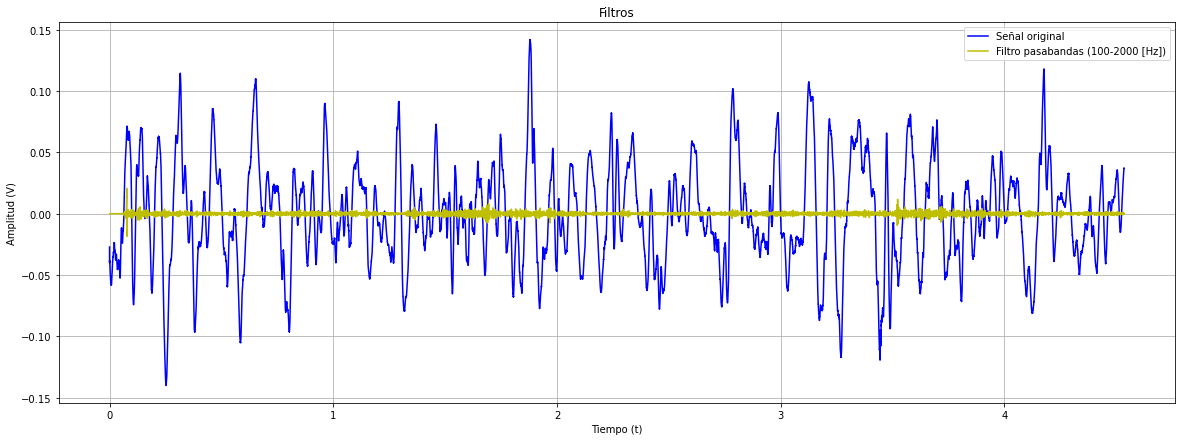

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


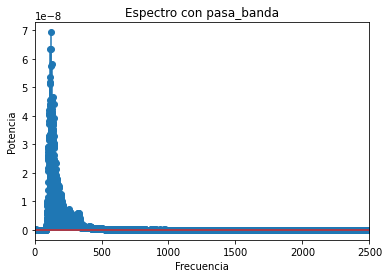

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


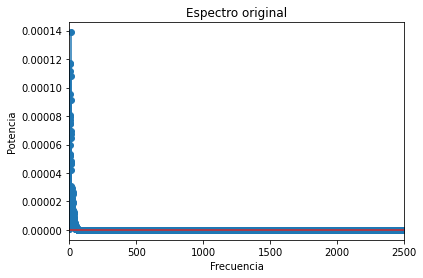

In [ ]:
 # ---------- Ejemplo de aplicación del filtro pasabanda, con la función filtros_butter-------------------------
primer_audio = archivos_audios[0]    #Se extrae una ruta de un archivo de audio
senal_ejemplo, fs = librosa.load(primer_audio)    # Señal y periodo de muestreo
senal_ejemplo_filtrada = filtros_butter(primer_audio)
t = np.arange(0, senal_ejemplo_filtrada.size/fs, 1/fs)     # vector de tiempo
# Grafica de la función original y filtrada
plt.figure(figsize = (20,7))
plt.plot(t[0:100000],senal_ejemplo[0:100000],'b',label = 'Señal original')
plt.plot(t[0:100000],senal_ejemplo_filtrada[0:100000],'y', label = 'Filtro pasabandas (100-2000 [Hz])')
plt.legend()
plt.title('Filtros')
plt.xlabel('Tiempo (t)')
plt.ylabel("Amplitud (V)")
plt.grid()
plt.show()

# Análisis Espectral

# Grafica del espectro de la senal filtrada
f, Pxx = signal.welch(senal_ejemplo_filtrada, fs, 'hanning', fs*2, fs)
plt.stem(f, Pxx);
plt.title('Espectro con pasa_banda');
plt.xlabel('Frecuencia');
plt.ylabel('Potencia');
plt.xlim([0, 2500]); #rango para el eje X
plt.show();
#Graficamos el espectro de la senal original
f, Pxx = signal.welch(senal_ejemplo, fs, 'hanning', fs*2, fs)
plt.stem(f, Pxx);
plt.title('Espectro original');
plt.xlabel('Frecuencia');
plt.ylabel('Potencia');
plt.xlim([0, 2500]); #rango para el eje X
plt.show();
# --------------------------------------------------------

A continución está el codigo para la aplicación del filtro wavelet a un archivo de audio. La señal original está compuesta de la señal respiratoria y una señal cardiaca que se considera como ruido, ya que esta no es la señal de interés. Con el filtro wavelet se obtiene la señal grande (cardiaca) y se le resta a la señal original, obteniendo finalmente la señal pequeña (respiratoria), como se observa en las amplitudes de las figuras que imprime el siguiente código.

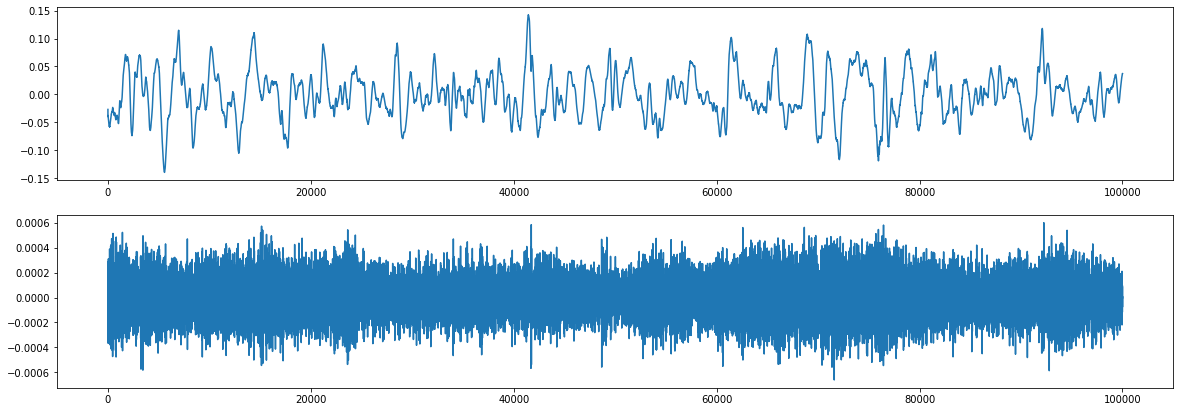

In [ ]:
#----------------- Ejemplo de aplicación del filtro wavelet--------------------------------
primer_audio = archivos_audios[0]    #Se extrae una ruta de un archivo de audio
senal_ejemplo, fs = librosa.load(primer_audio)    # Señal y periodo de muestreo
senal_ej_wavelet = filtrar(senal_ejemplo)
t = np.arange(0, senal_ejemplo.size/fs, 1/fs)     # vector de tiempo
plt.figure(figsize = (20,7))
plt.subplot(2,1,1)
plt.plot(senal_ejemplo[0:100000],label = 'Señal original')
plt.subplot(2,1,2)
plt.plot(senal_ej_wavelet[0:100000],label = 'Señal sin ruidos cardiacos')
# ----------------------------------------------------------

> b. Discutir las diferencias espectrales entre poblaciones (10%)

A partir del gráfico mostrado a continuación, es posible observar la densidad espectral de potencia promedio correspondiente a las 3 poblaciones de estudio, normal, crepitante y sibilante.

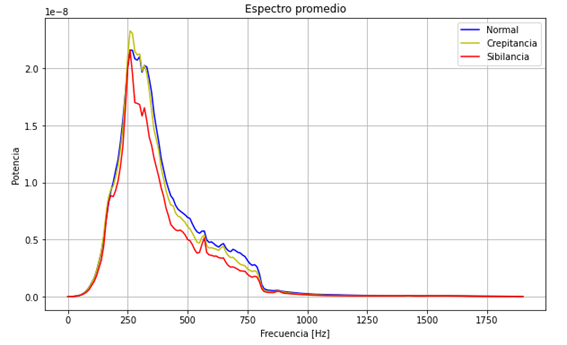

Allí se puede apreciar, como para el rango comprendido entre 250 y 770 Hz se presenta una diferencia notoria entre las poblaciones mencionadas, lo que indica así, que para esta banda de frecuencia característica se tiene una buena contribución de energía, permitiendo así, diferenciar una de la otra. Por otro lado, también se observa un pico de mayor amplitud para la población con crepitancia en el rango comprendido entre 250 y 370 Hz, siendo este más sobresaliente en comparación con el de las otras 2 poblaciones, caso contrario ocurre en el rango de frecuencia comprendido entre 470 y 770 Hz, donde allí se aprecia cómo la densidad de potencia es mayor para la población normal

> c. Análisis de la información procesada y estudiada mediante estadística
descriptiva (unidad 1) indicando las características estadísticas básicas de la señal normal, con sibilancias y con crepitaciones (15%) y las respectivas
diferencias (15%).

Al analizar el promedio y la desviación estándar del índice 1(250-370) para las 3 señales, normal, con sibilancias y crepitaciones, se observa como el promedio y la desviación estándar para estas, tiende a diferir un poco, lo que indica así, que, para la banda de frecuencia seleccionada, el espectro promedio de las 3 señales es diferente, siendo la más notoria, la de los ciclos crepitantes.

Ahora, para realizar la prueba de hipótesis se procede a utilizar la prueba de normalidad de shapiro, la calcula el valor de p, en donde si este valor es mayor a 0.05, se presenta una probabilidad Gaussiana y se obtienen así, los siguientes resultados:

Como para las 3 señales, dentro de la banda seleccionada, el valor de p resulto ser menor al nivel se significancia, es decir, menor a 0.05, se procedió a utilizar una prueba no paramétrica Mann-Whitney U Test, la cual indica si la distribución de dos muestras independientes son iguales o no; para ello, se tiene en cuenta el parámetro p, el cual es un valor de probabilidad e indica la evidencia en contra de la hipótesis nula, es decir, si p < 0.05, se refuta dicha hipótesis, en el caso contrario, no se puede rechazar esta.

Planteamiento de las pruebas de hipótesis, nula y alternativa, para luego confirmar según sea el caso, cuál se cumple.

Ciclos normales vs ciclos con crepitaciones

Hipótesis nula Ho: Los ciclos normales y los ciclos con crepitaciones presentan una misma distribución.

Hipótesis alternativa Ha: Los ciclos normales y los ciclos con crepitaciones no presentan una misma distribución.

Dado que al realizar la prueba de Mann-Whitney U Test se obtuvo un valor de p < 0.05, se refuta la hipótesis nula, y se acepta la hipótesis alternativa, es decir, se afirma que dichos ciclos, normales y crepitantes, no presentan una misma distribución.

Ciclos normales vs ciclos con sibilancias

Hipótesis nula Ho: Los ciclos normales y los ciclos con sibilancias presentan una misma distribución.
.
Hipótesis alternativa Ha: Los ciclos normales y los ciclos con sibilancias no presentan una misma distribución.

De manera análoga al caso anterior, se tiene que, dado que al realizar la prueba de Mann-Whitney U Test se obtuvo un valor de p < 0.05, se refuta la hipótesis nula, y se acepta la hipótesis alternativa, es decir, se afirma que dichos ciclos, normales y crepitantes, no presentan una misma distribución.

Por lo tanto, los 3 ciclos presentan un espectro promedio diferente entre sí.


> d. Código y análisis de resultados, donde se discutan por los menos tres
diferentes arquitecturas de red (20%) y las matrices de confusión obtenidas
(10%), de una red neuronal que permita la clasificación de ciclos normales de
ciclos con crepitancias y ciclos normal de ciclos con sibilancias usando la
densidad espectral de potencia y entropía de permutación

**Clasificacion con redes neuronales**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#Dataframe
tabla = pd.DataFrame({'Indice_250-370hz':matriz[:,0],'Indice_470-770hz':matriz[:,1],'Entropia':matriz[:,2],
                        'Normal':matriz[:,3],'Crepitancia':matriz[:,4],
                        'Sibilancia':matriz[:,5]})
tabla.head()

,Indice_250-370hz,Indice_470-770hz,Entropia,Normal,Crepitancia,Sibilancia
0,0.277236,0.365672,1.796833,1.0,0.0,0.0
1,0.287379,0.273524,1.764489,1.0,0.0,0.0
2,0.340199,0.208767,1.714211,1.0,0.0,0.0
3,0.305447,0.347159,1.798350,1.0,0.0,0.0
4,0.343128,0.264492,1.740734,1.0,0.0,0.0


In [ ]:
#Normales vs crepitantes
matriz1=np.vstack((normal, crepitancia))

tabla1 = pd.DataFrame({'Indice_250-370hz':matriz[:,0],'Indice_470-770hz':matriz[:,1],'Entropia':matriz[:,2],
                        'Normal':matriz[:,3],'Crepitancia':matriz[:,4],
                        'Sibilancia':matriz[:,5]})
tabla1.head()

,Indice_250-370hz,Indice_470-770hz,Entropia,Normal,Crepitancia,Sibilancia
0,0.277236,0.365672,1.796833,1.0,0.0,0.0
1,0.287379,0.273524,1.764489,1.0,0.0,0.0
2,0.340199,0.208767,1.714211,1.0,0.0,0.0
3,0.305447,0.347159,1.798350,1.0,0.0,0.0
4,0.343128,0.264492,1.740734,1.0,0.0,0.0


In [ ]:
#Normales vs sibilantes
matriz2=np.vstack((normal, sibilancia))

tabla2 = pd.DataFrame({'Indice_250-370hz':matriz[:,0],'Indice_470-770hz':matriz[:,1],'Entropia':matriz[:,2],
                        'Normal':matriz[:,3],'Crepitancia':matriz[:,4],
                        'Sibilancia':matriz[:,5]})
tabla2.head()

,Indice_250-370hz,Indice_470-770hz,Entropia,Normal,Crepitancia,Sibilancia
0,0.277236,0.365672,1.796833,1.0,0.0,0.0
1,0.287379,0.273524,1.764489,1.0,0.0,0.0
2,0.340199,0.208767,1.714211,1.0,0.0,0.0
3,0.305447,0.347159,1.798350,1.0,0.0,0.0
4,0.343128,0.264492,1.740734,1.0,0.0,0.0


In [ ]:
#Separamos las caracteristas de las etiquetas
target_column1 = ['Crepitancia']
target_column2 = ['Sibilancia']
target_column3 = ['Normal']

predictors = list(set(list(tabla1.columns))-set(target_column1)-set(target_column2)-set(target_column3))
print(predictors)

tabla1.head()

['Indice_250-370hz', 'Indice_470-770hz', 'Entropia']


,Indice_250-370hz,Indice_470-770hz,Entropia,Normal,Crepitancia,Sibilancia
0,0.277236,0.365672,1.796833,1.0,0.0,0.0
1,0.287379,0.273524,1.764489,1.0,0.0,0.0
2,0.340199,0.208767,1.714211,1.0,0.0,0.0
3,0.305447,0.347159,1.798350,1.0,0.0,0.0
4,0.343128,0.264492,1.740734,1.0,0.0,0.0


In [ ]:
#Creamos los dataset de entrenamiento y de prueba (CREPITANCIAS)
X1 = tabla1[predictors].values
y1 = tabla1[target_column3].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=40)
y_test1 = np.squeeze(y_test1)
y_train1 = np.squeeze(y_train1)
print(X_train1.shape)
print(y_train1.shape)

print(X_test1.shape)
print(y_test1.shape)

(1793, 3)
(1793,)
(769, 3)
(769,)


In [ ]:
#Creamos los dataset de entrenamiento y de prueba (SIBILANCIAS)
X2 = tabla2[predictors].values
y2 = tabla2[target_column3].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=40)
y_test2 = np.squeeze(y_test2)
y_train2 = np.squeeze(y_train2)
print(X_train2.shape)
print(y_train2.shape)

print(X_test2.shape)
print(y_test2.shape)

(1793, 3)
(1793,)
(769, 3)
(769,)


**Primer modelo de prediccion**

In [ ]:
#Definimos la estructura de las capas ocultas de la red (crepitancias)
mlp1a = MLPClassifier(hidden_layer_sizes=(3,2,2), activation='relu', solver='adam', max_iter=500) # 3 capas de 2 neuronas cada una
print(mlp1a)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Definimos la estructura de las capas ocultas de la red (sibilancias)
mlp2a = MLPClassifier(hidden_layer_sizes=(3,2,2), activation='relu', solver='adam', max_iter=500)
print(mlp2a)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Entrenamos el modelo CREPITANCIAS
mlp1a.fit(X_train1,y_train1)
predict_train1A = mlp1a.predict(X_train1)#Obtenemos la salida para los datos de entrenamiento
predict_test1A = mlp1a.predict(X_test1)#Obtenemos la salida para los datos de prueba

#Entrenamos el modelo SIBILANCIAS
mlp2a.fit(X_train2,y_train2)
predict_train2A = mlp2a.predict(X_train2)#Obtenemos la salida para los datos de entrenamiento
predict_test2A = mlp2a.predict(X_test2)#Obtenemos la salida para los datos de prueba

In [ ]:
#Matriz de confusion para entrenamiento MODELO A
#CREPITANCIA
print('Matriz de confusion para entrenamiento MODELO A CREPITANCIA')
print(confusion_matrix(y_train1,predict_train1A))
target_names1 = ['Normal', 'Crepitante']
print(classification_report(y_train1,predict_train1A,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para entrenamiento MODELO A SIBILANCIA')
print(confusion_matrix(y_train2,predict_train2A))
target_names2 = ['Normal', 'Sibilante']
print(classification_report(y_train2,predict_train2A,target_names=target_names2))

Matriz de confusion para entrenamiento MODELO A CREPITANCIA
[[830 119]
 [647 197]]
              precision    recall  f1-score   support

      Normal       0.56      0.87      0.68       949
  Crepitante       0.62      0.23      0.34       844

    accuracy                           0.57      1793
   macro avg       0.59      0.55      0.51      1793
weighted avg       0.59      0.57      0.52      1793

Matriz de confusion para entrenamiento MODELO A SIBILANCIA
[[949   0]
 [844   0]]
              precision    recall  f1-score   support

      Normal       0.53      1.00      0.69       949
   Sibilante       0.00      0.00      0.00       844

    accuracy                           0.53      1793
   macro avg       0.26      0.50      0.35      1793
weighted avg       0.28      0.53      0.37      1793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Matriz de confusion para test MODELO A
#CREPITANCIA
print('Matriz de confusion para test MODELO A CREPITANCIA')
print(confusion_matrix(y_test1,predict_test1A))
print(classification_report(y_test1,predict_test1A,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para test MODELO A SIBILANCIA')
print(confusion_matrix(y_test2,predict_test2A))
print(classification_report(y_test2,predict_test2A,target_names=target_names2))

Matriz de confusion para test MODELO A CREPITANCIA
[[326  54]
 [307  82]]
              precision    recall  f1-score   support

      Normal       0.52      0.86      0.64       380
  Crepitante       0.60      0.21      0.31       389

    accuracy                           0.53       769
   macro avg       0.56      0.53      0.48       769
weighted avg       0.56      0.53      0.48       769

Matriz de confusion para test MODELO A SIBILANCIA
[[380   0]
 [389   0]]
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       380
   Sibilante       0.00      0.00      0.00       389

    accuracy                           0.49       769
   macro avg       0.25      0.50      0.33       769
weighted avg       0.24      0.49      0.33       769



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Segundo modelo de prediccion**

In [ ]:
#Definimos la estructura de las capas ocultas de la red (crepitancias)
mlp1b = MLPClassifier(hidden_layer_sizes=(2,2,1), activation='relu', solver='adam', max_iter=500)
print(mlp1b)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Definimos la estructura de las capas ocultas de la red (sibilancias)
mlp2b = MLPClassifier(hidden_layer_sizes=(2,2,1), activation='relu', solver='adam', max_iter=500)
print(mlp2b)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Entrenamos el modelo CREPITANCIAS
mlp1b.fit(X_train1,y_train1)
predict_train1B = mlp1b.predict(X_train1)#Obtenemos la salida para los datos de entrenamiento
predict_test1B = mlp1b.predict(X_test1)#Obtenemos la salida para los datos de prueba

#Entrenamos el modelo SIBILANCIAS
mlp2b.fit(X_train2,y_train2)
predict_train2B = mlp2b.predict(X_train2)#Obtenemos la salida para los datos de entrenamiento
predict_test2B = mlp2b.predict(X_test2)#Obtenemos la salida para los datos de prueba

In [ ]:
#Matriz de confusion para entrenamiento MODELO B
#CREPITANCIA
print('Matriz de confusion para entrenamiento MODELO B CREPITANCIA')
print(confusion_matrix(y_train1,predict_train1B))
target_names1 = ['Normal', 'Crepitante']
print(classification_report(y_train1,predict_train1B,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para entrenamiento MODELO B SIBILANCIA')
print(confusion_matrix(y_train2,predict_train2B))
target_names2 = ['Normal', 'Sibilante']
print(classification_report(y_train2,predict_train2B,target_names=target_names2))

Matriz de confusion para entrenamiento MODELO B CREPITANCIA
[[949   0]
 [844   0]]
              precision    recall  f1-score   support

      Normal       0.53      1.00      0.69       949
  Crepitante       0.00      0.00      0.00       844

    accuracy                           0.53      1793
   macro avg       0.26      0.50      0.35      1793
weighted avg       0.28      0.53      0.37      1793

Matriz de confusion para entrenamiento MODELO B SIBILANCIA
[[874  75]
 [702 142]]
              precision    recall  f1-score   support

      Normal       0.55      0.92      0.69       949
   Sibilante       0.65      0.17      0.27       844

    accuracy                           0.57      1793
   macro avg       0.60      0.54      0.48      1793
weighted avg       0.60      0.57      0.49      1793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Matriz de confusion para test MODELO B
#CREPITANCIA
print('Matriz de confusion para test MODELO B CREPITANCIA')
print(confusion_matrix(y_test1,predict_test1B))
print(classification_report(y_test1,predict_test1B,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para test MODELO B SIBILANCIA')
print(confusion_matrix(y_test2,predict_test2B))
print(classification_report(y_test2,predict_test2B,target_names=target_names2))

Matriz de confusion para test MODELO B CREPITANCIA
[[380   0]
 [389   0]]
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       380
  Crepitante       0.00      0.00      0.00       389

    accuracy                           0.49       769
   macro avg       0.25      0.50      0.33       769
weighted avg       0.24      0.49      0.33       769

Matriz de confusion para test MODELO B SIBILANCIA
[[351  29]
 [330  59]]
              precision    recall  f1-score   support

      Normal       0.52      0.92      0.66       380
   Sibilante       0.67      0.15      0.25       389

    accuracy                           0.53       769
   macro avg       0.59      0.54      0.45       769
weighted avg       0.59      0.53      0.45       769



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Tercer modelo de prediccion**

In [ ]:
#Definimos la estructura de las capas ocultas de la red (crepitancias)
mlp1c = MLPClassifier(hidden_layer_sizes=(2,2,1), activation='relu', solver='adam', max_iter=500)
print(mlp1c)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Definimos la estructura de las capas ocultas de la red (sibilancias)
mlp2c = MLPClassifier(hidden_layer_sizes=(2,2,1), activation='relu', solver='adam', max_iter=500) # 3 capas de 2 neuronas cada una
print(mlp2c)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Entrenamos el modelo CREPITANCIAS
mlp1c.fit(X_train1,y_train1)
predict_train1C = mlp1c.predict(X_train1)#Obtenemos la salida para los datos de entrenamiento
predict_test1C = mlp1c.predict(X_test1)#Obtenemos la salida para los datos de prueba

#Entrenamos el modelo SIBILANCIAS
mlp2c.fit(X_train2,y_train2)
predict_train2C = mlp2c.predict(X_train2)#Obtenemos la salida para los datos de entrenamiento
predict_test2C = mlp2c.predict(X_test2)#Obtenemos la salida para los datos de prueba

In [ ]:
#Matriz de confusion para entrenamiento MODELO C
#CREPITANCIA
print('Matriz de confusion para entrenamiento MODELO C CREPITANCIA')
print(confusion_matrix(y_train1,predict_train1C))
target_names1 = ['Normal', 'Crepitante']
print(classification_report(y_train1,predict_train1C,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para entrenamiento MODELO C SIBILANCIA')
print(confusion_matrix(y_train2,predict_train2C))
target_names2 = ['Normal', 'Sibilante']
print(classification_report(y_train2,predict_train2C,target_names=target_names2))

Matriz de confusion para entrenamiento MODELO C CREPITANCIA
[[949   0]
 [844   0]]
              precision    recall  f1-score   support

      Normal       0.53      1.00      0.69       949
  Crepitante       0.00      0.00      0.00       844

    accuracy                           0.53      1793
   macro avg       0.26      0.50      0.35      1793
weighted avg       0.28      0.53      0.37      1793

Matriz de confusion para entrenamiento MODELO C SIBILANCIA
[[943   6]
 [844   0]]
              precision    recall  f1-score   support

      Normal       0.53      0.99      0.69       949
   Sibilante       0.00      0.00      0.00       844

    accuracy                           0.53      1793
   macro avg       0.26      0.50      0.34      1793
weighted avg       0.28      0.53      0.36      1793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Matriz de confusion para test MODELO C
#CREPITANCIA
print('Matriz de confusion para test MODELO C CREPITANCIA')
print(confusion_matrix(y_test1,predict_test1C))
print(classification_report(y_test1,predict_test1C,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para test MODELO C SIBILANCIA')
print(confusion_matrix(y_test2,predict_test2C))
print(classification_report(y_test2,predict_test2C,target_names=target_names2))

Matriz de confusion para test MODELO C CREPITANCIA
[[380   0]
 [389   0]]
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       380
  Crepitante       0.00      0.00      0.00       389

    accuracy                           0.49       769
   macro avg       0.25      0.50      0.33       769
weighted avg       0.24      0.49      0.33       769

Matriz de confusion para test MODELO C SIBILANCIA
[[377   3]
 [389   0]]
              precision    recall  f1-score   support

      Normal       0.49      0.99      0.66       380
   Sibilante       0.00      0.00      0.00       389

    accuracy                           0.49       769
   macro avg       0.25      0.50      0.33       769
weighted avg       0.24      0.49      0.33       769



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RESULTADOS**


Se encontro que el modelo 'mlp2a' presenta una buena respuesta al predecir Crepitancias

In [ ]:
print(mlp2a)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Matriz de confusion para test MODELO A
#CREPITANCIA
print('Matriz de confusion para test MODELO A CREPITANCIA')
print(confusion_matrix(y_test1,predict_test1A))
print(classification_report(y_test1,predict_test1A,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para test MODELO A SIBILANCIA')
print(confusion_matrix(y_test2,predict_test2A))
print(classification_report(y_test2,predict_test2A,target_names=target_names2))

Matriz de confusion para test MODELO A CREPITANCIA
[[326  54]
 [307  82]]
              precision    recall  f1-score   support

      Normal       0.52      0.86      0.64       380
  Crepitante       0.60      0.21      0.31       389

    accuracy                           0.53       769
   macro avg       0.56      0.53      0.48       769
weighted avg       0.56      0.53      0.48       769

Matriz de confusion para test MODELO A SIBILANCIA
[[380   0]
 [389   0]]
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       380
   Sibilante       0.00      0.00      0.00       389

    accuracy                           0.49       769
   macro avg       0.25      0.50      0.33       769
weighted avg       0.24      0.49      0.33       769



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se encontro que el modelo 'mlp2a' presenta una buena respuesta al predecir Sibilancias

In [ ]:
print(mlp2b)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
#Matriz de confusion para test MODELO B
#CREPITANCIA
print('Matriz de confusion para test MODELO B CREPITANCIA')
print(confusion_matrix(y_test1,predict_test1B))
print(classification_report(y_test1,predict_test1B,target_names=target_names1))
#SIBILANCIA
print('Matriz de confusion para test MODELO B SIBILANCIA')
print(confusion_matrix(y_test2,predict_test2B))
print(classification_report(y_test2,predict_test2B,target_names=target_names2))

Matriz de confusion para test MODELO B CREPITANCIA
[[380   0]
 [389   0]]
              precision    recall  f1-score   support

      Normal       0.49      1.00      0.66       380
  Crepitante       0.00      0.00      0.00       389

    accuracy                           0.49       769
   macro avg       0.25      0.50      0.33       769
weighted avg       0.24      0.49      0.33       769

Matriz de confusion para test MODELO B SIBILANCIA
[[351  29]
 [330  59]]
              precision    recall  f1-score   support

      Normal       0.52      0.92      0.66       380
   Sibilante       0.67      0.15      0.25       389

    accuracy                           0.53       769
   macro avg       0.59      0.54      0.45       769
weighted avg       0.59      0.53      0.45       769



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> e. Consultar como funciona, realizar y discutir un ejemplo con los datos de los ciclos respiratorios del algoritmo de K means (10%)

K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos.

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:

El algoritmo K-Means cuenta con 3 pasos
- Inicializacion: Una vez escogido el numero de grupos, se establecen k centroides en el espacio de los datos
- Asignacion: Cada objeto de los datos esasignado a su centroide mas cercano
- Actualizacion: Se actualiza la posicion del centroide de cada grupo tomando como nuevo centroide la posicion del promedio de los objetos

In [ ]:
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
Datos = pd.read_excel('/content/drive/Shareddrives/Proyecto_final/Datos/search_term_canada.xlsx').values
datos=Datos[:,4:]
warnings.filterwarnings('ignore')
datos.shape

(51, 6)

In [ ]:
n_clusters = 3
km=KMeans(n_clusters=n_clusters)
km.fit(datos)
y=km.predict(datos)
y.shape

(51,)

In [ ]:
pd.Series(y).value_counts()

1    24
2    15
0    12
dtype: int64

In [ ]:
km.cluster_centers_

array([[85.75      , 89.        , 79.        , 72.        , 87.58333333,
        84.5       ],
       [77.45833333, 75.875     , 79.125     , 57.79166667, 72.45833333,
        76.75      ],
       [75.66666667, 76.73333333, 74.        , 50.53333333, 62.93333333,
        56.73333333]])

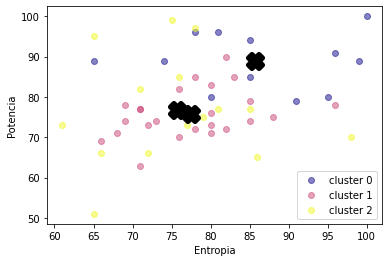

In [ ]:
def plot_clusters(datos,y):
  n_clusters=len(np.unique(y))
  cmap=plt.cm.bwr if n_clusters == 2 else plt.cm.plasma
  cmap((y*255./(n_clusters-1)).astype(int))
  for i in np.unique(y):
    col=cmap((i*255./(n_clusters-1)).astype(int))
    Xr=datos[y==i]
    plt.scatter(Xr[:,0],Xr[:,1],color=col,label='cluster %d'%i,alpha=.5)
  plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='X', lw=5, s=200, color='black')
  plt.legend()
  plt.xlabel('Entropia')
  plt.ylabel('Potencia')
plot_clusters(datos,y)